In [5]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
import numpy as np

dataset = pd.read_csv('Final_dataset.csv')

X = dataset.drop(columns=['target']).values
y = dataset['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3859 - accuracy: 0.8452 - val_loss: 0.3303 - val_accuracy: 0.8874
Epoch 2/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3295 - accuracy: 0.8833 - val_loss: 0.3101 - val_accuracy: 0.8978
Epoch 3/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3126 - accuracy: 0.8914 - val_loss: 0.2978 - val_accuracy: 0.9038
Epoch 4/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3001 - accuracy: 0.8945 - val_loss: 0.2853 - val_accuracy: 0.9042
Epoch 5/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.2895 - accuracy: 0.8993 - val_loss: 0.2750 - val_accuracy: 0.9045
Epoch 6/10
1250/1250 [==============================] - 2s 1ms/step - loss: 0.2820 - accuracy: 0.8985 - val_loss: 0.2685 - val_accuracy: 0.9044
Epoch 7/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2740 - accuracy: 0.9023 - val_loss: 0.2578 - val_accuracy:

In [6]:
model.save('pokemon_model.h5')

c:\Users\VASU\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import cv2
import matplotlib.pyplot as plt

using = pd.read_csv("useful.csv")
def get_features(pokemon_id,pokemon):
    return (pokemon.iloc[pokemon_id - 1, 0::1])


def rename_column(first_or_second, features):
     list_ = features.columns.to_list()
     if first_or_second:
          for i in range(len(list_)):
               list_[i] = 'First_' + list_[i]

     else:
          for i in range(len(list_)):
               list_[i] = 'Second_' + list_[i]

     features.columns = list_
first_pokemon = using.copy()
rename_column(True, first_pokemon)
second_pokemon = using.copy()
rename_column(False, second_pokemon)

pokemon = pd.read_csv("pokemon_data.csv")
def get_image_fight(pokemon_id_1, pokemon_id_2,pokemon):
    k = pokemon.loc[pokemon_id_1 - 1, 'Name']
    a = pokemon.loc[pokemon_id_2 - 1, 'Name']
    path = 'Pokemon Dataset'
    l1 = cv2.imread(path+f"/{k}.png")
    l2 = cv2.imread(path+f"/{a}.png")
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(l1)
    axes[0].axis('off')
    axes[0].set_title(f'{k} (pokemon 1)')
    axes[1].imshow(l2) 
    axes[1].axis('off') 
    axes[1].set_title(f'{a} (pokemon 2)')
    plt.show()

def winner(pokemon_id_1,pokemon):
    k = pokemon.loc[pokemon_id_1 - 1, 'Name']
    path = 'Pokemon Dataset'
    l = cv2.imread(path+f"/{k}.png")
    
    plt.imshow(l) 
    plt.axis('off') 
    plt.title(f'{k} (Winner)')
    plt.show()

pokemon = pd.read_csv("pokemon_data.csv")
def predictions(pokemon_id_1, pokemon_id_2,pokemon,using, model):
     get_image_fight(pokemon_id_1, pokemon_id_2,pokemon)
     y_mod = tf.keras.models.load_model(f'{model}.h5')
     k = pokemon.loc[pokemon_id_1 - 1, 'Name']
     a = pokemon.loc[pokemon_id_2 - 1, 'Name']
     print(f"The match is between {k} and {a}")
     first_pokemon = using.copy()
     rename_column(True, first_pokemon)
     second_pokemon = using.copy()
     rename_column(False, second_pokemon)
     l1 = get_features(pokemon_id_1, first_pokemon).to_frame().T
     l1.reset_index(drop= True, inplace= True)
     l2 = get_features(pokemon_id_2, second_pokemon).to_frame().T
     l2.reset_index(drop = True, inplace= True)
     l1.drop('First_#', axis = 1, inplace=True)
     l2.drop('Second_#', axis = 1, inplace=True)
     test_df = pd.concat([l1, l2], axis=1)
     y_mod = tf.keras.models.load_model('pokemon_model.h5')
     y_pred = y_mod.predict(test_df)
     if y_pred == 1:
        winner(pokemon_id_1,pokemon)
     else:
        winner(pokemon_id_2,pokemon)
    

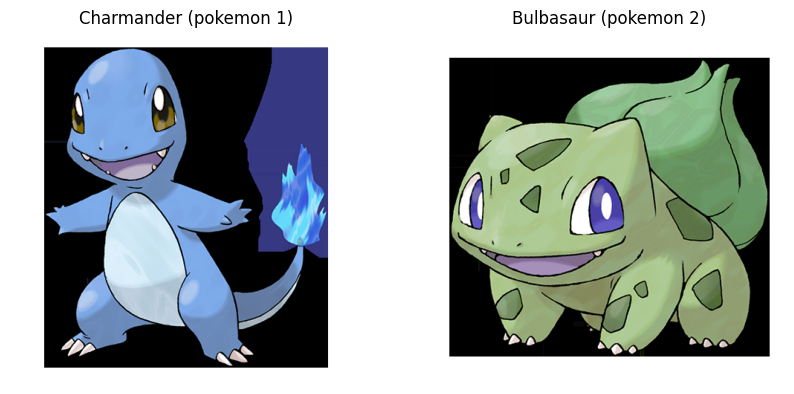

The match is between Charmander and Bulbasaur
1/1 [==============================] - 0s 49ms/step


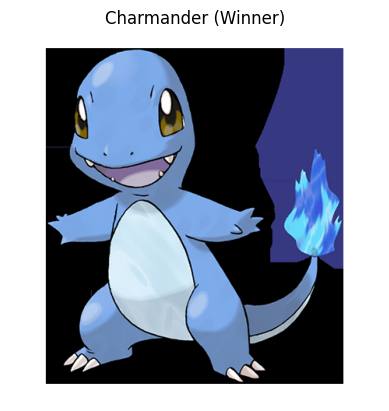

In [16]:
predictions(5, 1,pokemon,using, 'pokemon_model')